## Decision Tree Regressor

#### Business Scenario: Build an efficient model that predicts Power Enegery of a powerplant with changes in Atmospheric temp,pressure,Vaccum and humidity taken into consideration

## Step1: Data Gathering 

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd

In [4]:
path = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlant.csv'
df = pd.read_csv(path)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43



Dataset: Powerplant

    AT-Atmospheric Temperature
    V-Vaccum
    AP-Atmospheric Pressue
    RH-Relative Humidity
    PE - Power Energy generated

## Step2: Perform basic data quality checks

In [5]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [6]:
df.shape

(9568, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
# missing data
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [9]:
# Chaeck the duplicates
df.duplicated().sum()

np.int64(41)

#### Drop The duplicates


In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

np.int64(0)

## Separate X and Y features
    Y: target label - PE
    X: Remaining features

In [12]:
X = df.drop(columns="PE")
Y = df[["PE"]]

In [13]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [14]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Step3: Data Preprocessing and Data Cleaning

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#### In this data set only continuous data that's why direct make continuous pipeline.

In [16]:
pre = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

In [17]:
X_pre = pre.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Step4: Split the data into training and testing

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.60,random_state=21)

In [20]:
xtrain.head()

,AT,V,AP,RH
6088,-1.595676,-1.191380,1.916247,0.808876
297,-0.754731,-0.433831,0.737838,0.131107
609,0.133231,0.963024,0.286676,-0.103031
4931,1.547792,1.162462,-0.849647,-1.616715
4010,-1.638664,-0.983271,3.271417,0.085923


In [21]:
xtest.head()

,AT,V,AP,RH
4903,0.340109,0.683180,1.061059,-0.367977
2944,0.023076,0.405701,-0.043279,1.225807
1771,-0.354409,-0.744418,0.192403,-0.730823
1450,-0.586811,-1.020320,-1.164450,0.631561
5399,-0.310078,-1.148812,-1.723353,-0.596639


In [22]:
ytrain.head()

,PE
6088,484.65
297,464.09
609,456.49
4931,441.26
4010,483.11


## Step5: Build the model

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
model = DecisionTreeRegressor(
    max_depth=3,
    min_samples_leaf = 4,
    min_samples_split = 6,
    criterion='squared_error'
)
model.fit(xtrain,ytrain)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,6
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [25]:
model.score(xtrain,ytrain)

0.9122595866013398

In [26]:
model.score(xtest,ytest)

0.9065507170255204


## Hyperparameter tuning with GridsearchCV

In [27]:
params = {
    'max_depth':[3,4,5,6,7,8,9,10],
    'min_samples_split':[1,2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
    'criterion':['squared_error','absolute_error']
}

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
base_model = DecisionTreeRegressor()

In [30]:
gscv = GridSearchCV(estimator=base_model,param_grid=params,cv=3,scoring='r2')
gscv.fit(xtrain,ytrain)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [3, 4, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [1, 2, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [31]:
gscv.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'min_samples_leaf': 9,
 'min_samples_split': 2}

In [32]:
gscv.best_score_

np.float64(0.939409224977215)

In [33]:
best_dtr = gscv.best_estimator_

In [34]:
best_dtr.score(xtrain,ytrain)

0.9571714914741996

In [35]:
best_dtr.score(xtest,ytest)

0.9394971346497274

## Step6: Model Evaluation

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [37]:
ypred_test = best_dtr.predict(xtest)

In [42]:
mse = mean_squared_error(ytest,ypred_test)
mae = mean_absolute_error(ytest,ypred_test)
r2= r2_score(ytest,ypred_test)
rmse = mse**(1/2)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"RMSE is :{rmse}")
print(f"R2 score is:{r2*100}%")

MSE is :17.6759298599522
MAE is :3.1110209776167292
RMSE is :4.204275188418594
R2 score is:93.94971346497275%


## Step7: Plot the decision tree

In [43]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree

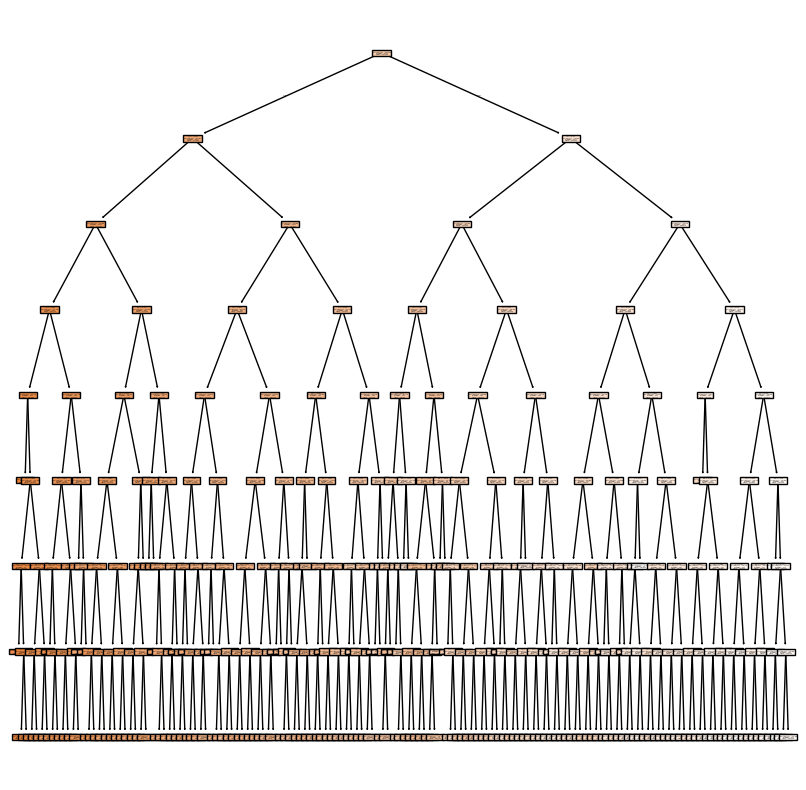

In [44]:
plt.figure(figsize=(10,10))
plot_tree(best_dtr,feature_names=xtrain.columns,filled=True)
plt.show()

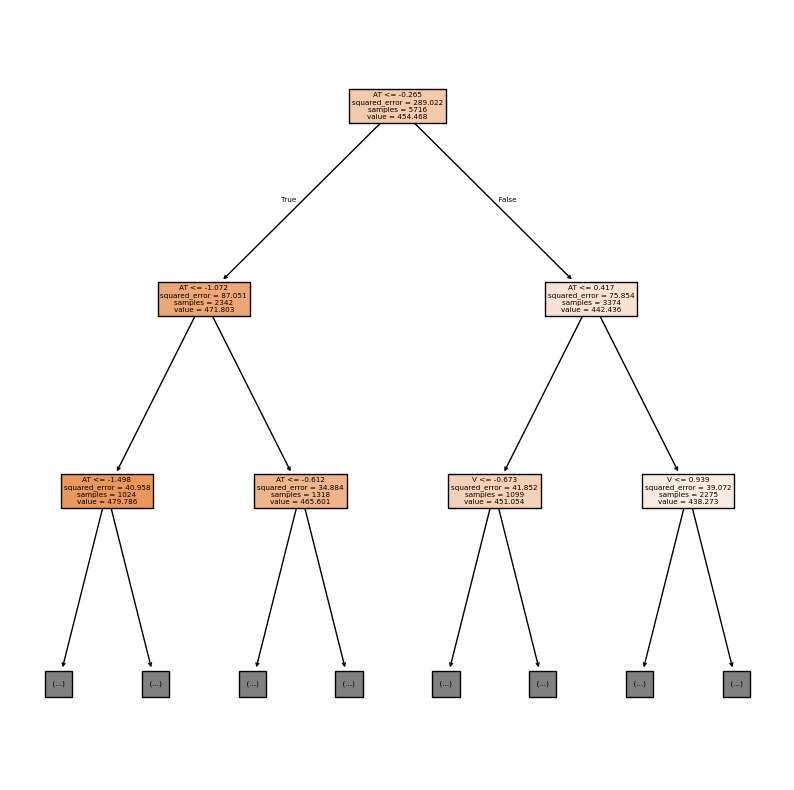

In [45]:
plt.figure(figsize=(10,10))
plot_tree(best_dtr,feature_names=xtrain.columns,max_depth=2,filled=True)
plt.show()

In [46]:
best_dtr.feature_importances_

array([0.94000781, 0.04407825, 0.00826174, 0.0076522 ])

In [47]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [48]:
imp_cols = pd.Series(best_dtr.feature_importances_,index=index=xtrain.columns)
imp_cols

SyntaxError: invalid syntax (2995440862.py, line 1)

## Step8: Out of sample predictions

In [ ]:
path2 = r"https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlantTest.csv"
xnew = pd.read_csv(path2)
xnew.head()

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [ ]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,-0.174482,-0.511275,0.113992


In [50]:
PowerEnergy_predicted = best_dtr.predict(xnew_pre).round(2)
PowerEnergy_predicted

array([444.63, 438.53, 439.88])

In [51]:
xnew["PE_Predicted"] = PowerEnergy_predicted

In [52]:
xnew

,AT,V,AP,RH,PE_Predicted
0,25,51.5,1000.1,57.0,444.63
1,32,41.0,1051.1,80.0,438.53
2,28,NaN,1010.2,NaN,439.88


## Step9: Save the result to csv files

In [53]:
xnew.to_csv("Powerplant results.csv",index=False)